In [5]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [18]:
speckdict = {"학교":[],
             "학과":[],
             "학점":[],
             "기타":[]}
speckdata = open('data_job.csv', mode='r', encoding='utf-8')
reader = csv.reader(speckdata)
for row in reader:
    speckdict['학교'].append(row[0])
    speckdict['학과'].append(row[1])
    speckdict['학점'].append(row[3])
    speckdict['기타'].append(row[4:])
speckdata.close()
speckDF = pd.DataFrame(speckdict)

speckDF['기타'].to_csv('gitadata.csv', encoding='utf-8')
speckdata.close()

for row in speckDF.index:
    if '/' in speckDF.loc[row,'학점']:
        speckDF.loc[row,'학점'] = speckDF.loc[row,'학점'].split('/')[0]
        
speckDF.drop(labels='기타',axis=1, inplace=True)
        
speckDF

,학교,학과,학점
0,국숭세단,산업공학과,3.93
1,안양대,정보통계학과,3.52
2,지방사립대,통계학,4.21
3,동덕여대,경영학/정보통계학,3.9
4,국숭세단,산업공학과,3.93
...,...,...,...
71,서울4년제,통계학과,4.0
72,서울,통계,3.6
73,한양대학교,경제금융,3.56
74,지방국립대,경영학과,4.0


In [17]:
for row in speckDF.index:
    if '/' in speckDF.loc[row,'학점']:
        speckDF.loc[row,'학점'] = speckDF.loc[row,'학점'].split('/')[0]
speckDF['학점'].unique()
speckDF['학점'] = speckDF['학점'].astype('float64')

TypeError: argument of type 'numpy.float64' is not iterable

In [8]:
for row in speckDF.index:
    print(speckDF.loc[row,'학과'])


산업공학과
정보통계학과
통계학
경영학/정보통계학
산업공학과
경영학과
경영학/정보통계학
철학과
경제학부
응용통계학과
경영학/정보통계학
컴퓨터정보공학
산업공학과
경영학/정보통계학
응용통계학과
경영학과
경영학과
컴퓨터공학과
정보통신공학부
안전공학전공
기계
경제학부
아동가족
경제학부
행정학과
산업공학과
경영학과
산업경영공학부
경제학부
아동복지학과
응용통계학과
정보통신학부
디자인
국사학과
국사학과
통계학과
산업공학과
경제학부
경제학부
소프트웨어공학
산업공학
경영학과
수학
전자공학
기계공학과
문과
산업공학과
이과
항공우주/기계공학과
전산통계
정보통신공학과
산업경영공학과
경영학과
임베디드 시스템 공학과
경제학부
경영
-
컴퓨터공학전공
산업공학과
산업공학과
-
전산통계
경영학부
정보통신공학과
-
경영/도시
-
산업공학과
경영/통계
통계학과
통계학과
통계학과
통계
경제금융
경영학과
-


In [9]:
words = ['통계', '컴퓨터', '데이터', '통신','정보','소프트웨어']
for row in speckDF.index:
    for word in words:
        speckDF.loc[speckDF['학과'].str.contains(word), '학과'] = '전공'

    speckDF.loc[speckDF['학과'] != '전공', '학과'] = '비전공'

majorDF = pd.DataFrame(speckDF['학과'].value_counts())
majorDF = majorDF.astype('int64')
majorDF

,count
학과,
비전공,52
전공,24


[52, 24]


Text(0.5, 1.0, '[합격자 비전공/전공 비율]')

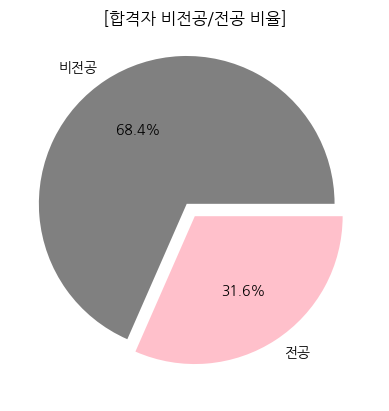

In [10]:
xlist = majorDF.index
ylist = []
for i in range(majorDF.shape[0]):
    ylist.append(majorDF.iloc[i][0])

print(ylist)

plt.pie(ylist, labels=xlist, colors = ['grey','pink'], explode=[0.1,0], autopct='%.1f%%')
plt.title('[합격자 비전공/전공 비율]')


In [11]:
scoreDF = speckDF[speckDF['학점'] != 0]['학점']


In [12]:
scoreDF.min()

2.8

(2.5, 4.5)

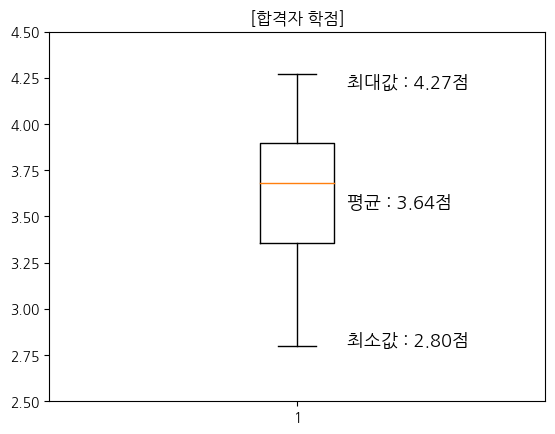

In [13]:

plt.boxplot(scoreDF)
plt.title('[합격자 학점]')
plt.text(1.1,3.55,f'평균 : {scoreDF.mean():.2f}점',size = 13)
plt.text(1.1,4.2,f'최대값 : {scoreDF.max():.2f}점',size = 13)
plt.text(1.1,2.8,f'최소값 : {scoreDF.min():.2f}점',size = 13)
plt.ylim(2.5,4.5)

Text(0.5, 1.0, '[합격자 학점]')

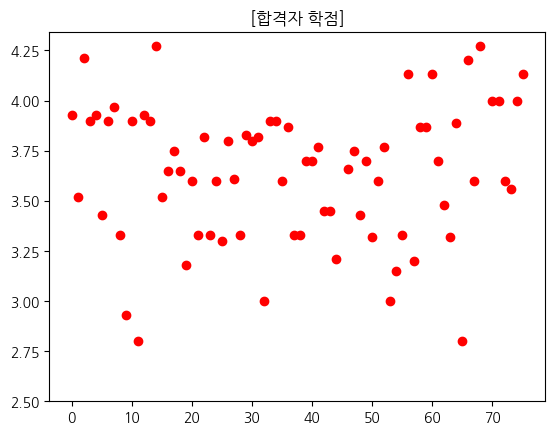

In [14]:
plt.scatter(scoreDF.index, scoreDF,color = 'red')
plt.ylim(2.5, None)
plt.title('[합격자 학점]')